In [1]:
from tensorflow.keras import layers, models, datasets, utils, Input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

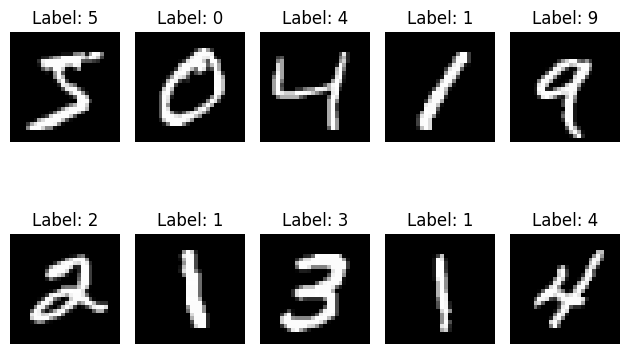

In [3]:
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title(f"Label: {y_train[i]}")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9484 - loss: 0.1739 - val_accuracy: 0.9832 - val_loss: 0.0562
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9844 - loss: 0.0498 - val_accuracy: 0.9875 - val_loss: 0.0431
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9891 - loss: 0.0345 - val_accuracy: 0.9905 - val_loss: 0.0359
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9885 - val_loss: 0.0382
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9902 - val_loss: 0.0345
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9917 - val_loss: 0.0335
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9964 - loss: 0.0100 - val_accura

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9912 - loss: 0.0323
Test Accuracy: 0.9912, Test Loss: 0.0323


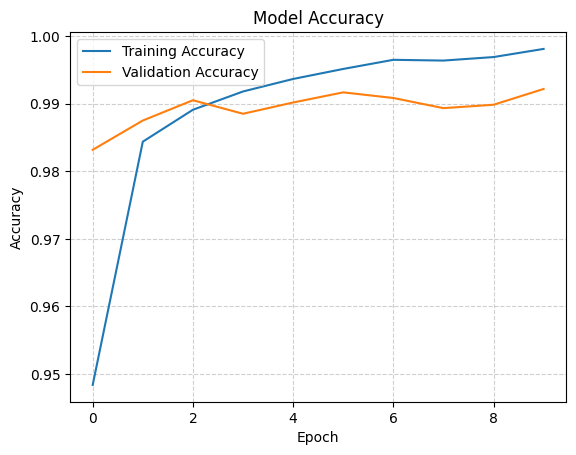

In [10]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

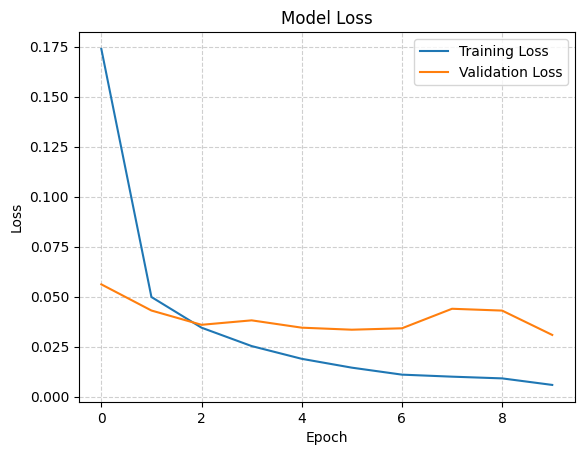

In [11]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Predicted:", y_pred_classes[:20])
print("True:     ", y_true[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


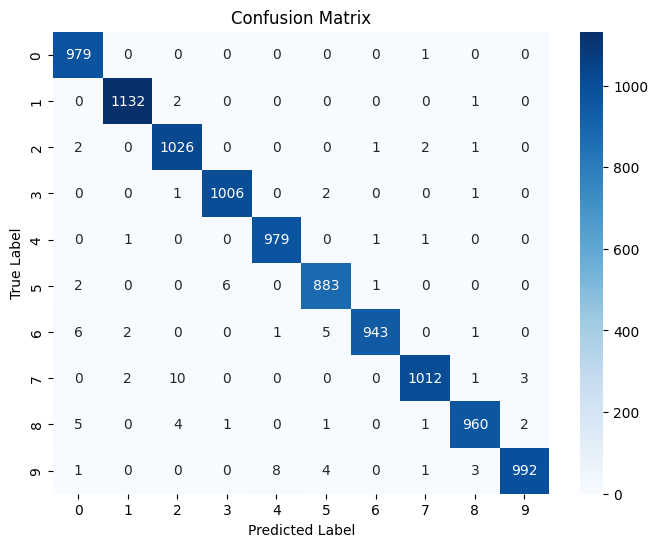

In [13]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Number of misclassified samples: 88
First 5 misclassified indices: [340 582 646 659 839]


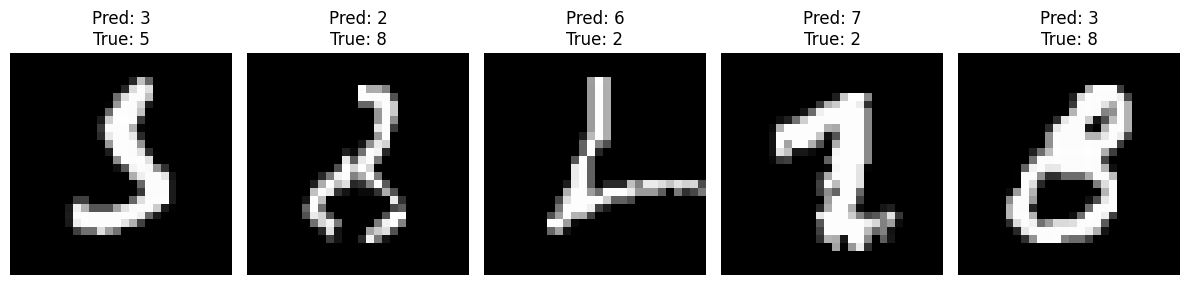

In [15]:
wrong_indices = np.where(y_pred_classes != y_true)[0]

print(f"Number of misclassified samples: {len(wrong_indices)}")
print(f"First 5 misclassified indices: {wrong_indices[:5]}")

fig, axes = plt.subplots(1, 5, figsize=(12, 6))

for i, idx in enumerate(wrong_indices[:5]):
    axes[i].imshow(x_test[idx].reshape(28,28), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred_classes[idx]}\nTrue: {y_true[idx]}")
    axes[i].axis("off")
    
plt.tight_layout()
plt.show()